In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split

# Define a simple MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Set random seeds for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Define hyperparameters
input_size = 32 * 32 * 3  # CIFAR-10 images are 32x32 with 3 channels (RGB)
hidden_size1 = 128
hidden_size2 = 64
output_size = 10  # Number of classes in CIFAR-10

# Initialize the model, loss function, and optimizer
model = MLP(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.CrossEntropyLoss()

# Use RMSprop as the optimizer
optimizer = optim.RMSprop(model.parameters(), lr=0.000001)

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Split dataset into training and validation sets
total_size = len(dataset)
train_size = int(0.8 * total_size)
val_size = total_size - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)

train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

# Training loop
num_epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.view(-1, input_size).to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    epoch_train_accuracy = 100.0 * correct_train / total_train
    epoch_train_loss= running_loss / len(train_loader)

    # Eğitim istatistiklerini kaydet
    train_loss_history.append(epoch_train_loss)
    train_accuracy_history.append(epoch_train_accuracy)

    # Validation loop
    correct_val = 0
    total_val = 0
    val_running_loss = 0.0

    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            inputs, labels = inputs.view(-1, input_size).to(device), labels.to(device)

            outputs = model(inputs)
            val_loss = criterion(outputs,labels)
            val_running_loss += val_loss.item()

            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    epoch_val_accuracy = 100.0 * correct_val / total_val
    epoch_val_loss= val_running_loss / len(val_loader)

    # Validasyon istatistiklerini kaydet
    val_loss_history.append(epoch_val_loss)
    val_accuracy_history.append(epoch_val_accuracy)

    print('Epoch %d, Train Loss: %.3f, Train Acc: %% %.2f,'
              'Val Loss: %.3f, Val Acc: %% %.2f' %
          (epoch + 1, epoch_train_loss, epoch_train_accuracy, epoch_val_loss, epoch_val_accuracy))

print("Training finished")

# Save the trained model
torch.save(model.state_dict(), 'mlp_cifar10_rms_0000001.pth')

Files already downloaded and verified
Epoch 1, Train Loss: 2.294, Train Acc: % 15.07,Val Loss: 2.287, Val Acc: % 16.38
Epoch 2, Train Loss: 2.279, Train Acc: % 17.64,Val Loss: 2.273, Val Acc: % 18.83
Epoch 3, Train Loss: 2.266, Train Acc: % 19.80,Val Loss: 2.261, Val Acc: % 20.34
Epoch 4, Train Loss: 2.253, Train Acc: % 21.09,Val Loss: 2.248, Val Acc: % 22.09
Epoch 5, Train Loss: 2.240, Train Acc: % 22.22,Val Loss: 2.235, Val Acc: % 23.08
Epoch 6, Train Loss: 2.226, Train Acc: % 22.89,Val Loss: 2.221, Val Acc: % 23.72
Epoch 7, Train Loss: 2.212, Train Acc: % 23.77,Val Loss: 2.208, Val Acc: % 24.07
Epoch 8, Train Loss: 2.198, Train Acc: % 24.04,Val Loss: 2.194, Val Acc: % 24.47
Epoch 9, Train Loss: 2.185, Train Acc: % 24.52,Val Loss: 2.182, Val Acc: % 24.89
Epoch 10, Train Loss: 2.173, Train Acc: % 25.03,Val Loss: 2.169, Val Acc: % 25.22
Epoch 11, Train Loss: 2.160, Train Acc: % 25.25,Val Loss: 2.158, Val Acc: % 25.21
Epoch 12, Train Loss: 2.149, Train Acc: % 25.35,Val Loss: 2.147, Val 

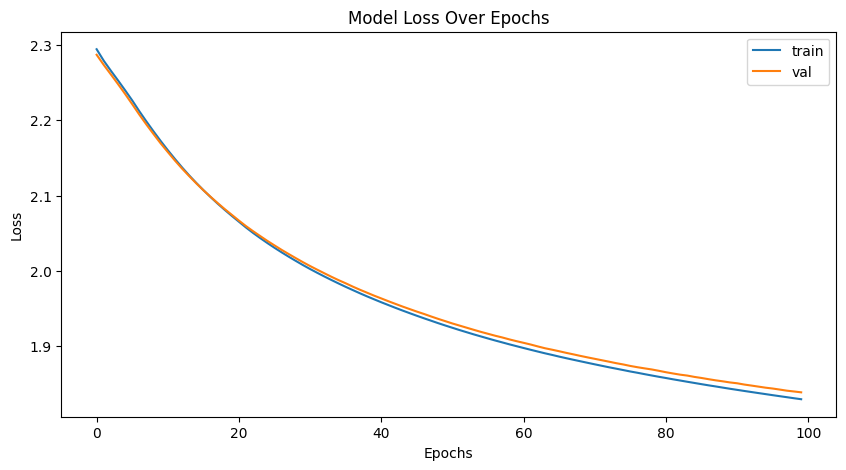

In [ ]:
# Grafik oluştur
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_loss_history)
plt.plot(val_loss_history)
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

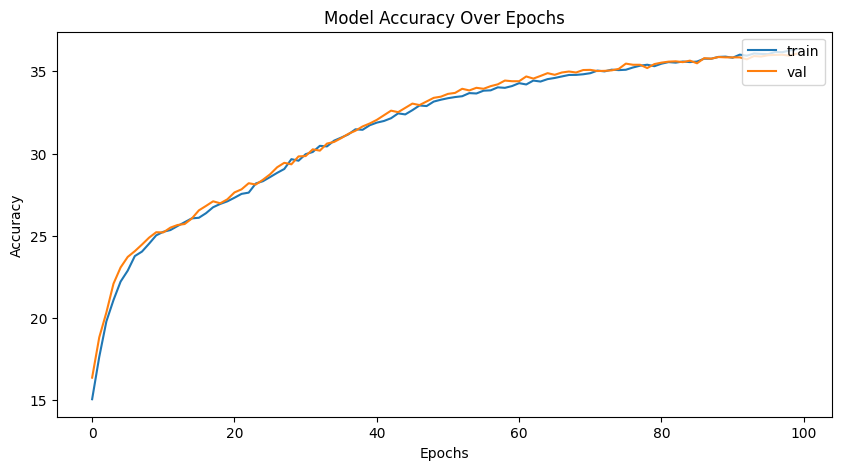

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_history)
plt.plot(val_accuracy_history)
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Files already downloaded and verified
Test veri seti üzerinde doğruluk: 10.02%
Confusion Matrix:
[[ 58  51 122   0  54  81 299 132 135  68]
 [ 57  73 126   0  64  62 295 122 131  70]
 [ 63  53 129   0  67  57 307 122 134  68]
 [ 65  67 105   0  64  59 324 137 113  66]
 [ 76  72 121   0  59  52 316 128 123  53]
 [ 54  55 116   0  70  77 336 107 114  71]
 [ 75  56 126   0  55  58 295 149 126  60]
 [ 52  66 129   0  69  62 320 119 121  62]
 [ 62  59 135   0  52  66 329 124 129  44]
 [ 63  73 141   0  71  51 304 110 124  63]]


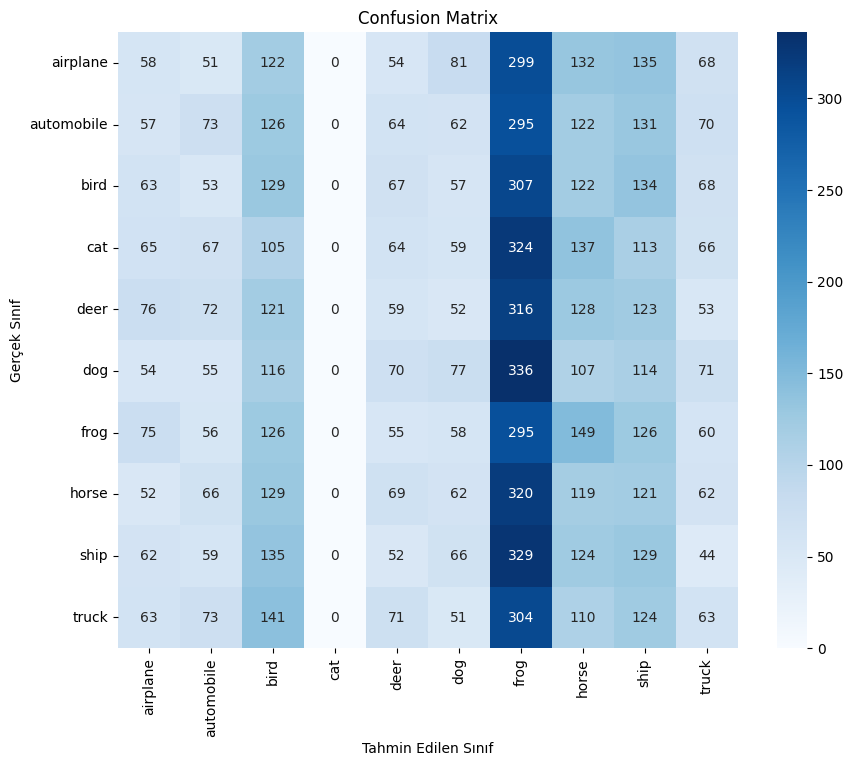

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

#Load test set
test_dataset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True, transform= transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=16,shuffle=True, num_workers=2)

# Test veri seti üzerinde doğruluk ve confusion matrix hesapla
y_true = []
y_pred = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = inputs.view(-1, input_size).to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Doğruluk ve Confusion Matrix'i ekrana yazdır
print(f'Test veri seti üzerinde doğruluk: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

# Confusion Matrix'i görselleştir
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split

# Define a simple MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Set random seeds for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Define hyperparameters
input_size = 32 * 32 * 3  # CIFAR-10 images are 32x32 with 3 channels (RGB)
hidden_size1 = 128
hidden_size2 = 64
output_size = 10  # Number of classes in CIFAR-10

# Initialize the model, loss function, and optimizer
model = MLP(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.CrossEntropyLoss()

# Use Adam as the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Split dataset into training and validation sets
total_size = len(dataset)
train_size = int(0.8 * total_size)
val_size = total_size - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)

train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

# Training loop
num_epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.view(-1, input_size).to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    epoch_train_accuracy = 100.0 * correct_train / total_train
    epoch_train_loss= running_loss / len(train_loader)

    # Eğitim istatistiklerini kaydet
    train_loss_history.append(epoch_train_loss)
    train_accuracy_history.append(epoch_train_accuracy)

    # Validation loop
    correct_val = 0
    total_val = 0
    val_running_loss = 0.0

    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            inputs, labels = inputs.view(-1, input_size).to(device), labels.to(device)

            outputs = model(inputs)
            val_loss = criterion(outputs,labels)
            val_running_loss += val_loss.item()

            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    epoch_val_accuracy = 100.0 * correct_val / total_val
    epoch_val_loss= val_running_loss / len(val_loader)

    # Validasyon istatistiklerini kaydet
    val_loss_history.append(epoch_val_loss)
    val_accuracy_history.append(epoch_val_accuracy)

    print('Epoch %d, Train Loss: %.3f, Train Acc: %% %.2f,'
              'Val Loss: %.3f, Val Acc: %% %.2f' %
          (epoch + 1, epoch_train_loss, epoch_train_accuracy, epoch_val_loss, epoch_val_accuracy))

print("Training finished")

# Save the trained model
torch.save(model.state_dict(), 'mlp_cifar10_adam_001.pth')

Files already downloaded and verified
Epoch 1, Train Loss: 1.978, Train Acc: % 27.55,Val Loss: 1.881, Val Acc: % 30.18
Epoch 2, Train Loss: 1.847, Train Acc: % 32.95,Val Loss: 1.833, Val Acc: % 34.80
Epoch 3, Train Loss: 1.830, Train Acc: % 33.62,Val Loss: 1.818, Val Acc: % 34.02
Epoch 4, Train Loss: 1.801, Train Acc: % 34.62,Val Loss: 1.795, Val Acc: % 34.70
Epoch 5, Train Loss: 1.787, Train Acc: % 35.58,Val Loss: 1.809, Val Acc: % 34.42
Epoch 6, Train Loss: 1.778, Train Acc: % 35.45,Val Loss: 1.827, Val Acc: % 33.70
Epoch 7, Train Loss: 1.774, Train Acc: % 35.88,Val Loss: 1.817, Val Acc: % 35.18
Epoch 8, Train Loss: 1.772, Train Acc: % 35.95,Val Loss: 1.786, Val Acc: % 35.06
Epoch 9, Train Loss: 1.752, Train Acc: % 36.77,Val Loss: 1.772, Val Acc: % 36.43
Epoch 10, Train Loss: 1.755, Train Acc: % 36.55,Val Loss: 1.828, Val Acc: % 34.41
Epoch 11, Train Loss: 1.756, Train Acc: % 36.46,Val Loss: 1.751, Val Acc: % 37.17
Epoch 12, Train Loss: 1.749, Train Acc: % 36.69,Val Loss: 1.787, Val 

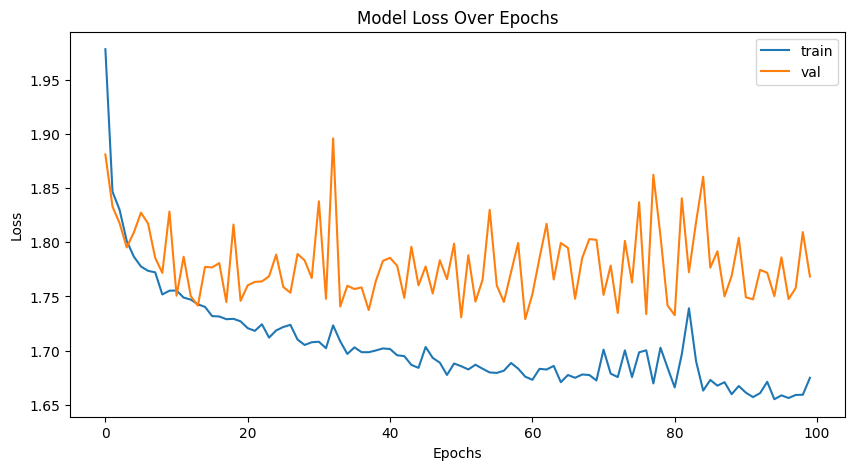

In [ ]:
# Grafik oluştur
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_loss_history)
plt.plot(val_loss_history)
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

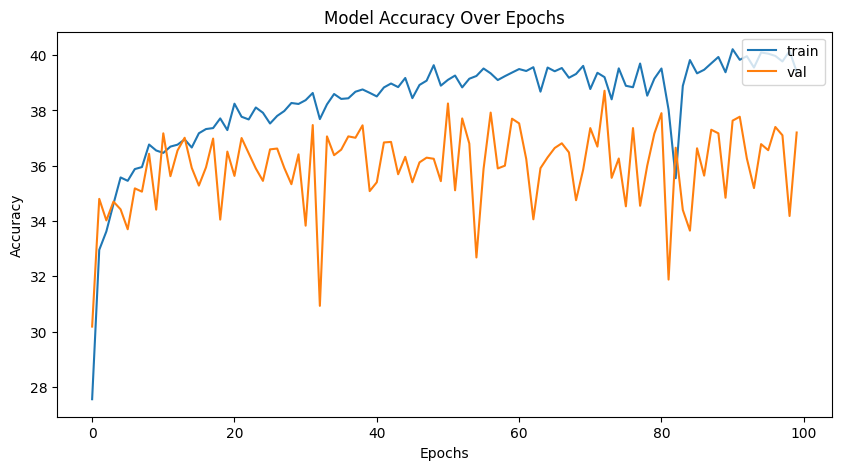

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_history)
plt.plot(val_accuracy_history)
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Files already downloaded and verified
Test veri seti üzerinde doğruluk: 10.30%
Confusion Matrix:
[[ 68  51   0  44 108 143 256  68 193  69]
 [ 69  73   0  54 121 139 225  70 188  61]
 [ 63  53   0  59 133 122 238  68 197  67]
 [ 52  67   0  68 117 124 268  66 178  60]
 [ 64  72   0  64 116 123 249  53 199  60]
 [ 58  55   0  77 128 135 252  71 168  56]
 [ 56  56   0  56 125 106 263  60 201  77]
 [ 53  66   0  60 145 140 243  62 173  58]
 [ 74  59   0  80 113 117 259  44 191  63]
 [ 68  73   0  63 144 101 247  63 187  54]]


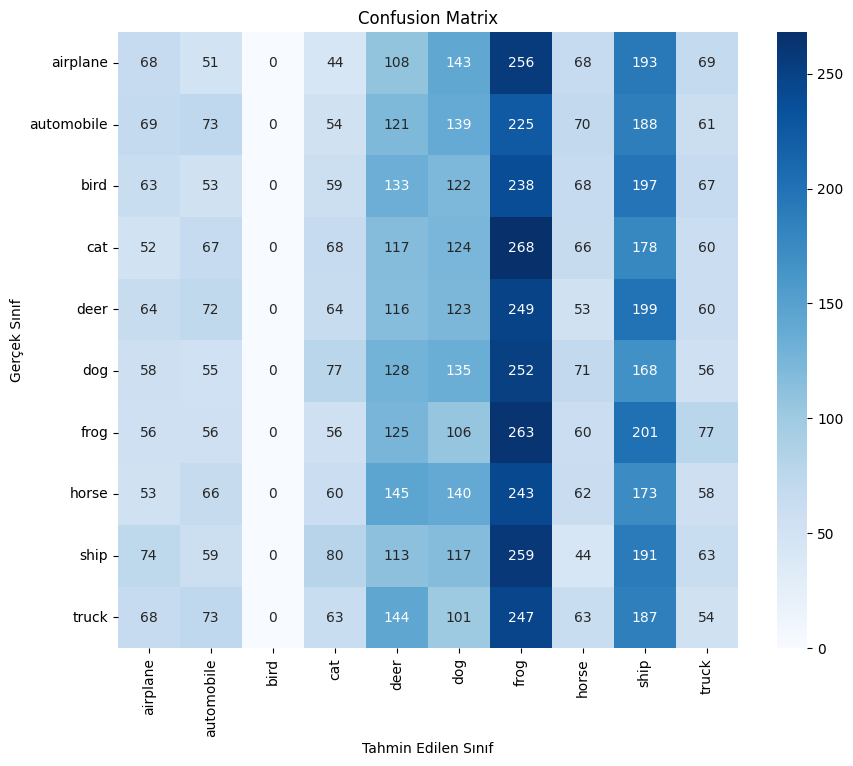

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

#Load test set
test_dataset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True, transform= transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=16,shuffle=True, num_workers=2)

# Test veri seti üzerinde doğruluk ve confusion matrix hesapla
y_true = []
y_pred = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = inputs.view(-1, input_size).to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Doğruluk ve Confusion Matrix'i ekrana yazdır
print(f'Test veri seti üzerinde doğruluk: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

# Confusion Matrix'i görselleştir
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split

# Define a simple MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Set random seeds for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Define hyperparameters
input_size = 32 * 32 * 3  # CIFAR-10 images are 32x32 with 3 channels (RGB)
hidden_size1 = 128
hidden_size2 = 64
output_size = 10  # Number of classes in CIFAR-10

# Initialize the model, loss function, and optimizer
model = MLP(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.CrossEntropyLoss()

# Use Adam as the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.000001)

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Split dataset into training and validation sets
total_size = len(dataset)
train_size = int(0.8 * total_size)
val_size = total_size - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)

train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

# Training loop
num_epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.view(-1, input_size).to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    epoch_train_accuracy = 100.0 * correct_train / total_train
    epoch_train_loss= running_loss / len(train_loader)

    # Eğitim istatistiklerini kaydet
    train_loss_history.append(epoch_train_loss)
    train_accuracy_history.append(epoch_train_accuracy)

    # Validation loop
    correct_val = 0
    total_val = 0
    val_running_loss = 0.0

    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            inputs, labels = inputs.view(-1, input_size).to(device), labels.to(device)

            outputs = model(inputs)
            val_loss = criterion(outputs,labels)
            val_running_loss += val_loss.item()

            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    epoch_val_accuracy = 100.0 * correct_val / total_val
    epoch_val_loss= val_running_loss / len(val_loader)

    # Validasyon istatistiklerini kaydet
    val_loss_history.append(epoch_val_loss)
    val_accuracy_history.append(epoch_val_accuracy)

    print('Epoch %d, Train Loss: %.3f, Train Acc: %% %.2f,'
              'Val Loss: %.3f, Val Acc: %% %.2f' %
          (epoch + 1, epoch_train_loss, epoch_train_accuracy, epoch_val_loss, epoch_val_accuracy))

print("Training finished")

# Save the trained model
torch.save(model.state_dict(), 'mlp_cifar10_adam_0000001.pth')

Files already downloaded and verified
Epoch 1, Train Loss: 2.297, Train Acc: % 14.68,Val Loss: 2.290, Val Acc: % 16.36
Epoch 2, Train Loss: 2.281, Train Acc: % 17.59,Val Loss: 2.274, Val Acc: % 18.67
Epoch 3, Train Loss: 2.265, Train Acc: % 20.30,Val Loss: 2.259, Val Acc: % 21.39
Epoch 4, Train Loss: 2.250, Train Acc: % 21.88,Val Loss: 2.244, Val Acc: % 23.09
Epoch 5, Train Loss: 2.235, Train Acc: % 23.05,Val Loss: 2.229, Val Acc: % 23.48
Epoch 6, Train Loss: 2.219, Train Acc: % 23.57,Val Loss: 2.214, Val Acc: % 24.09
Epoch 7, Train Loss: 2.205, Train Acc: % 24.29,Val Loss: 2.200, Val Acc: % 24.30
Epoch 8, Train Loss: 2.190, Train Acc: % 24.43,Val Loss: 2.186, Val Acc: % 24.84
Epoch 9, Train Loss: 2.176, Train Acc: % 24.82,Val Loss: 2.173, Val Acc: % 25.15
Epoch 10, Train Loss: 2.163, Train Acc: % 25.20,Val Loss: 2.160, Val Acc: % 25.13
Epoch 11, Train Loss: 2.151, Train Acc: % 25.52,Val Loss: 2.148, Val Acc: % 25.24
Epoch 12, Train Loss: 2.139, Train Acc: % 25.54,Val Loss: 2.137, Val 

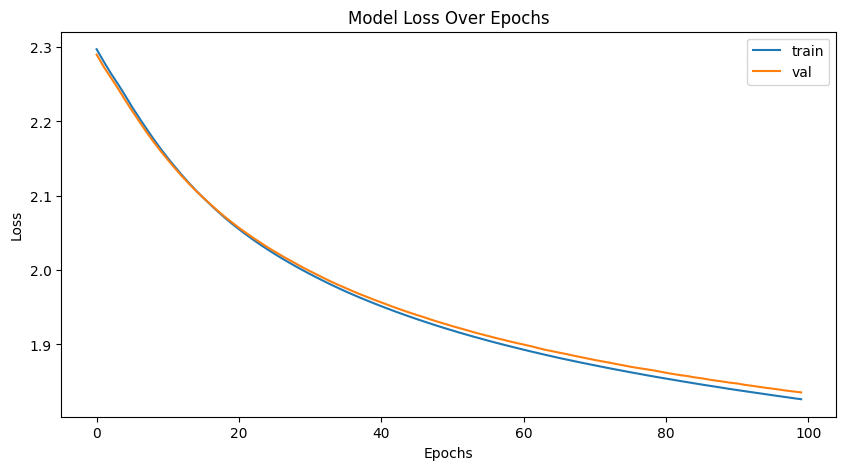

In [ ]:
# Grafik oluştur
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_loss_history)
plt.plot(val_loss_history)
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

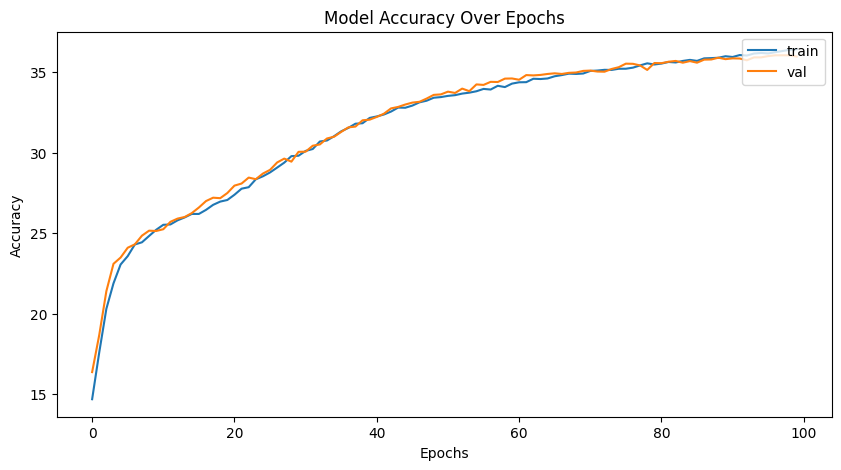

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_history)
plt.plot(val_accuracy_history)
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Files already downloaded and verified
Test veri seti üzerinde doğruluk: 10.02%
Confusion Matrix:
[[ 58  51 122   0  54  81 299 132 135  68]
 [ 57  73 126   0  64  62 295 122 131  70]
 [ 63  53 129   0  67  57 307 122 134  68]
 [ 65  67 105   0  64  59 324 137 113  66]
 [ 76  72 121   0  59  52 316 128 123  53]
 [ 54  55 116   0  70  77 336 107 114  71]
 [ 75  56 126   0  55  58 295 149 126  60]
 [ 52  66 129   0  69  62 320 119 121  62]
 [ 62  59 135   0  52  66 329 124 129  44]
 [ 63  73 141   0  71  51 304 110 124  63]]


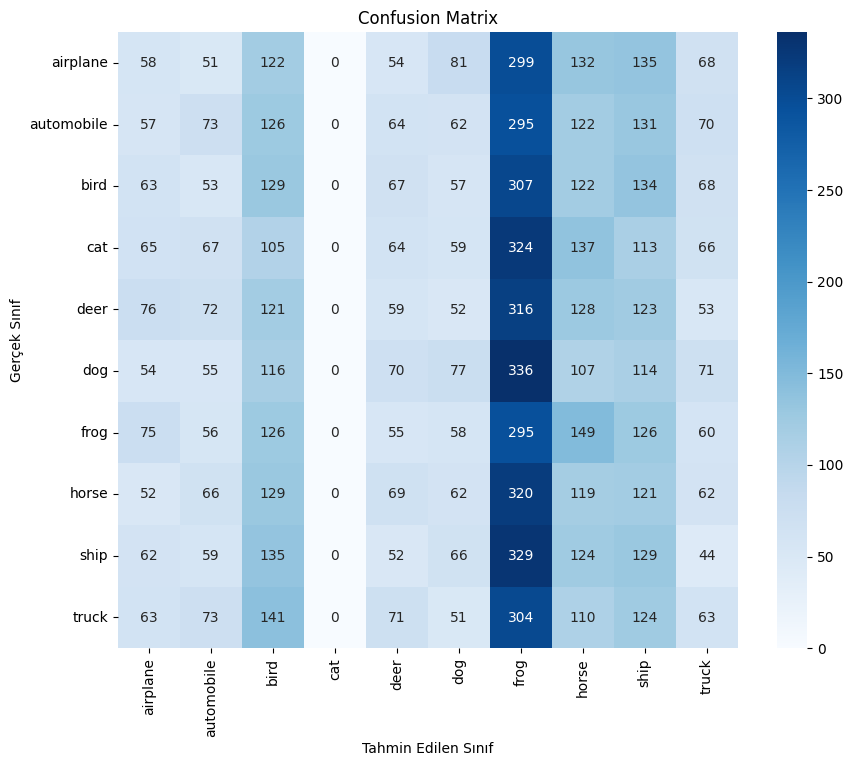

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

#Load test set
test_dataset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True, transform= transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=16,shuffle=True, num_workers=2)

# Test veri seti üzerinde doğruluk ve confusion matrix hesapla
y_true = []
y_pred = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = inputs.view(-1, input_size).to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Doğruluk ve Confusion Matrix'i ekrana yazdır
print(f'Test veri seti üzerinde doğruluk: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

# Confusion Matrix'i görselleştir
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split

# Define a simple MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Set random seeds for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Define hyperparameters
input_size = 32 * 32 * 3  # CIFAR-10 images are 32x32 with 3 channels (RGB)
hidden_size1 = 128
hidden_size2 = 64
output_size = 10  # Number of classes in CIFAR-10

# Initialize the model, loss function, and optimizer
model = MLP(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.CrossEntropyLoss()

# Use RMSprop as the optimizer
optimizer = optim.Adagrad(model.parameters(), lr=0.000001)

# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Split dataset into training and validation sets
total_size = len(dataset)
train_size = int(0.8 * total_size)
val_size = total_size - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=2)

train_loss_history = []
train_accuracy_history = []
val_loss_history = []
val_accuracy_history = []

# Training loop
num_epochs = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.view(-1, input_size).to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted.eq(labels).sum().item()

    epoch_train_accuracy = 100.0 * correct_train / total_train
    epoch_train_loss= running_loss / len(train_loader)

    # Eğitim istatistiklerini kaydet
    train_loss_history.append(epoch_train_loss)
    train_accuracy_history.append(epoch_train_accuracy)

    # Validation loop
    correct_val = 0
    total_val = 0
    val_running_loss = 0.0

    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            inputs, labels = inputs.view(-1, input_size).to(device), labels.to(device)

            outputs = model(inputs)
            val_loss = criterion(outputs,labels)
            val_running_loss += val_loss.item()

            _, predicted = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted.eq(labels).sum().item()

    epoch_val_accuracy = 100.0 * correct_val / total_val
    epoch_val_loss= val_running_loss / len(val_loader)

    # Validasyon istatistiklerini kaydet
    val_loss_history.append(epoch_val_loss)
    val_accuracy_history.append(epoch_val_accuracy)

    print('Epoch %d, Train Loss: %.3f, Train Acc: %% %.2f,'
              'Val Loss: %.3f, Val Acc: %% %.2f' %
          (epoch + 1, epoch_train_loss, epoch_train_accuracy, epoch_val_loss, epoch_val_accuracy))

print("Training finished")

# Save the trained model
torch.save(model.state_dict(), 'mlp_cifar10_adagrad_0000001.pth')

Files already downloaded and verified
Epoch 1, Train Loss: 2.305, Train Acc: % 11.29,Val Loss: 2.304, Val Acc: % 11.86
Epoch 2, Train Loss: 2.304, Train Acc: % 12.41,Val Loss: 2.303, Val Acc: % 12.69
Epoch 3, Train Loss: 2.303, Train Acc: % 12.99,Val Loss: 2.303, Val Acc: % 13.22
Epoch 4, Train Loss: 2.303, Train Acc: % 13.31,Val Loss: 2.302, Val Acc: % 13.55
Epoch 5, Train Loss: 2.302, Train Acc: % 13.61,Val Loss: 2.302, Val Acc: % 13.87
Epoch 6, Train Loss: 2.302, Train Acc: % 13.78,Val Loss: 2.302, Val Acc: % 14.15
Epoch 7, Train Loss: 2.301, Train Acc: % 13.94,Val Loss: 2.301, Val Acc: % 14.33
Epoch 8, Train Loss: 2.301, Train Acc: % 14.04,Val Loss: 2.301, Val Acc: % 14.41
Epoch 9, Train Loss: 2.301, Train Acc: % 14.16,Val Loss: 2.301, Val Acc: % 14.49
Epoch 10, Train Loss: 2.301, Train Acc: % 14.21,Val Loss: 2.301, Val Acc: % 14.56
Epoch 11, Train Loss: 2.300, Train Acc: % 14.29,Val Loss: 2.301, Val Acc: % 14.59
Epoch 12, Train Loss: 2.300, Train Acc: % 14.38,Val Loss: 2.300, Val 

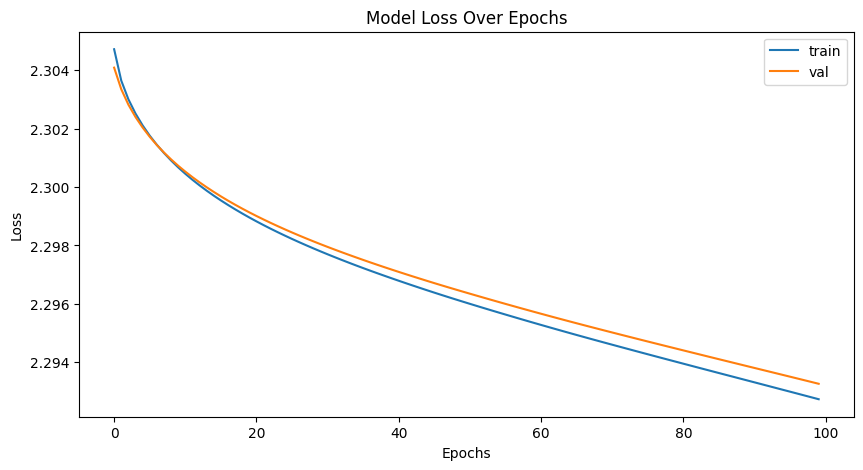

In [ ]:
# Grafik oluştur
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_loss_history)
plt.plot(val_loss_history)
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

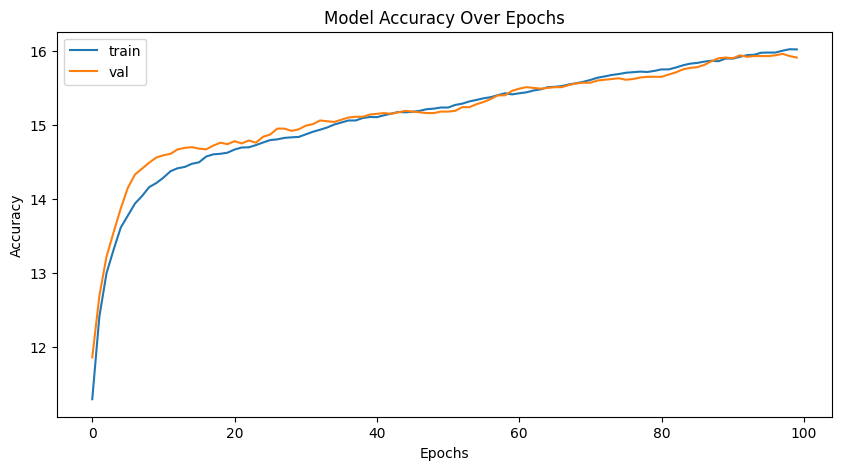

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_history)
plt.plot(val_accuracy_history)
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Files already downloaded and verified
Test veri seti üzerinde doğruluk: 10.15%
Confusion Matrix:
[[  0   0   0   0   0   0   0 676 324   0]
 [  0   0   0   0   0   0   0 676 324   0]
 [  0   0   0   0   0   0   0 662 338   0]
 [  0   0   0   0   0   0   0 707 293   0]
 [  0   0   0   0   0   0   0 683 317   0]
 [  0   0   0   0   0   0   0 708 292   0]
 [  0   0   0   0   0   0   0 665 335   0]
 [  0   0   0   0   0   0   0 714 286   0]
 [  0   0   0   0   0   0   0 699 301   0]
 [  0   0   0   0   0   0   0 685 315   0]]


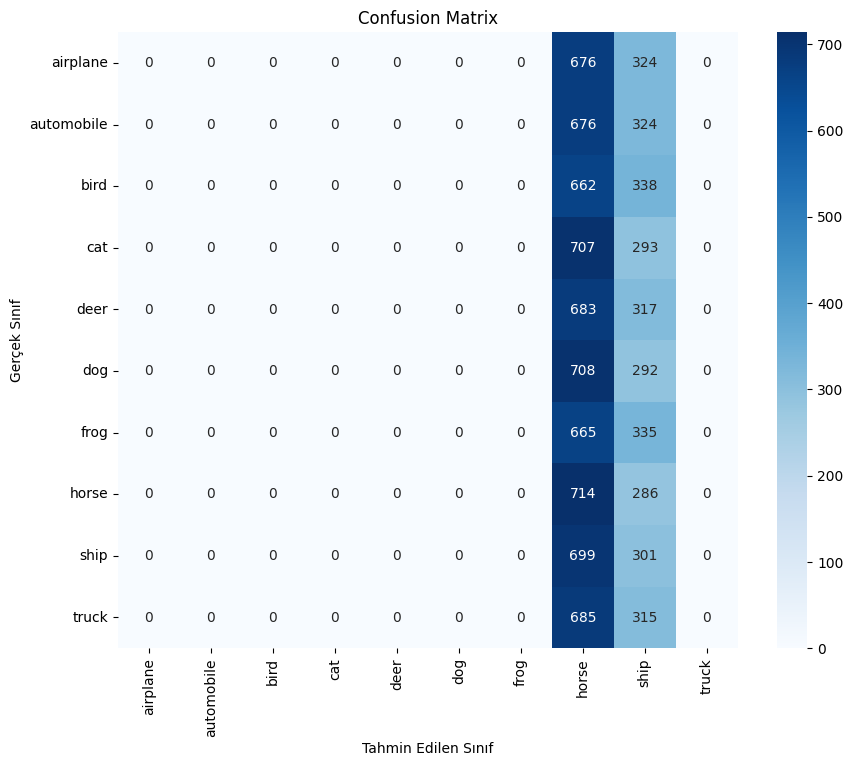

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

#Load test set
test_dataset = torchvision.datasets.CIFAR10(root='./data',train=False,download=True, transform= transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=16,shuffle=True, num_workers=2)

# Test veri seti üzerinde doğruluk ve confusion matrix hesapla
y_true = []
y_pred = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = inputs.view(-1, input_size).to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Doğruluk ve Confusion Matrix'i ekrana yazdır
print(f'Test veri seti üzerinde doğruluk: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

# Confusion Matrix'i görselleştir
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()